<a href="https://colab.research.google.com/github/Lucky0nTop/IA-1/blob/main/Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediccion de problemas cardiacos

Link a las diapositivas: https://www.canva.com/design/DAGhd2sCP1I/3DpDeeIm0dTAcmIJnda_cQ/edit

# Introduccion
El corazon es es uno de los organos vitales del ser humano y al saber que en colombia la causa principal de muertes son por enfermedades isquemicas cardiacas, nos vimos en la necesidad de predecir cuando una persona puede sufrir una enfermedad cardiaca

El proyecto aplica técnicas de Machine Learning (ML) y Deep Learning (DL) para predecir la presencia de enfermedades cardíacas en individuos, a partir de variables clínicas y demográficas como la edad, presión arterial, colesterol, frecuencia cardíaca, entre otras. El objetivo es construir modelos predictivos que apoyen el diagnóstico temprano y mejoren la toma de decisiones médicas.

![imagen](https://api.parashospitals.com/uploads/2021/03/Prevention-of-Heart-Disease.png)



In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('deep')
path = 'https://raw.githubusercontent.com/Lucky0nTop/IA-1/main/data/heart.csv'
# Download
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Esto lo que hace es cambiar el tipado de las columnas categoricas de objeto a strings

In [ ]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

df[categorical_columns] = df[categorical_columns].astype('string')

In [ ]:
df.dtypes

,0
Age,int64
Sex,string[python]
ChestPainType,string[python]
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,string[python]
MaxHR,int64
ExerciseAngina,string[python]
Oldpeak,float64


In [ ]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
print(df['Sex'].value_counts())
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())

Sex
M    725
F    193
Name: count, dtype: Int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64


In [ ]:
categoricas = pd.pivot_table(df,
                             index=['Sex', 'ChestPainType', 'RestingECG'],
                             columns='HeartDisease',
                             aggfunc='size',
                             fill_value=0)
categoricas

HeartDisease                   0    1
Sex ChestPainType RestingECG         
F   ASY           LVH         10   12
                  Normal      16   22
                  ST           5    5
    ATA           LVH          7    2
                  Normal      40    2
                  ST           9    0
    NAP           LVH         15    0
                  Normal      27    4
                  ST           5    2
    TA            LVH          1    0
                  Normal       6    1
                  ST           2    0
M   ASY           LVH         11   69
                  Normal      44  202
                  ST          18   82
    ATA           LVH          9    5
                  Normal      72    9
                  ST          12    6
    NAP           LVH         19   13
                  Normal      57   35
                  ST           8   18
    TA            LVH         10    5
                  Normal       5   10
                  ST           2    4

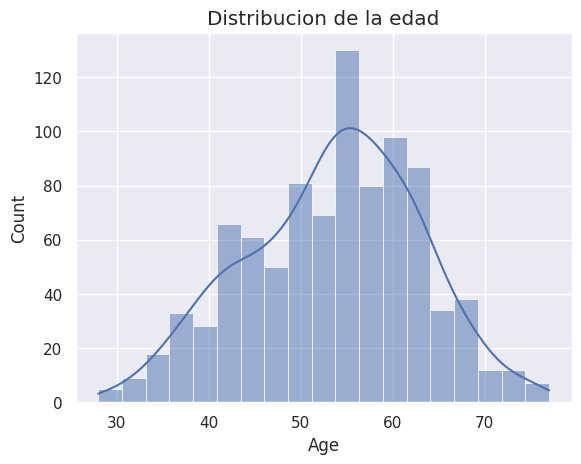

In [ ]:
sns.histplot(df['Age'],kde=True)
plt.title('Distribucion de la edad')
plt.show()

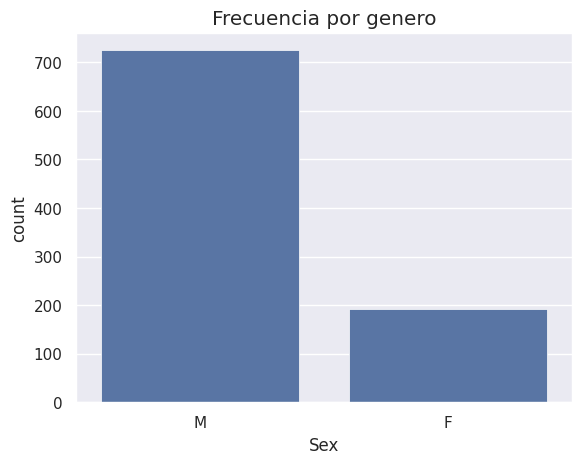

In [ ]:
sns.countplot(data=df, x='Sex')
plt.title('Frecuencia por genero')
plt.show()

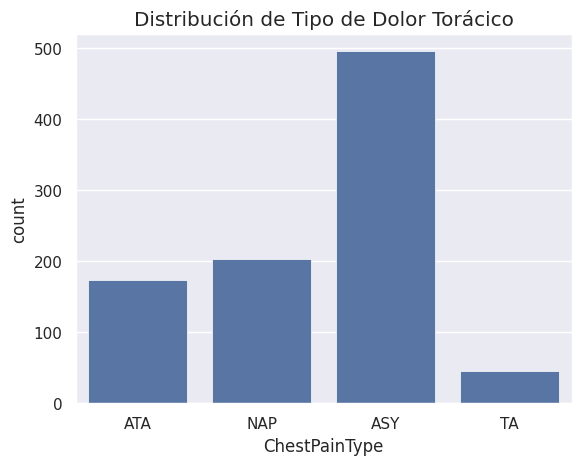

In [ ]:
sns.countplot(data=df, x='ChestPainType')
plt.title('Distribución de Tipo de Dolor Torácico')
plt.show()

Ahora se analizara si las variables tienen alguna relacion entre si a traves de una matriz de correlacion

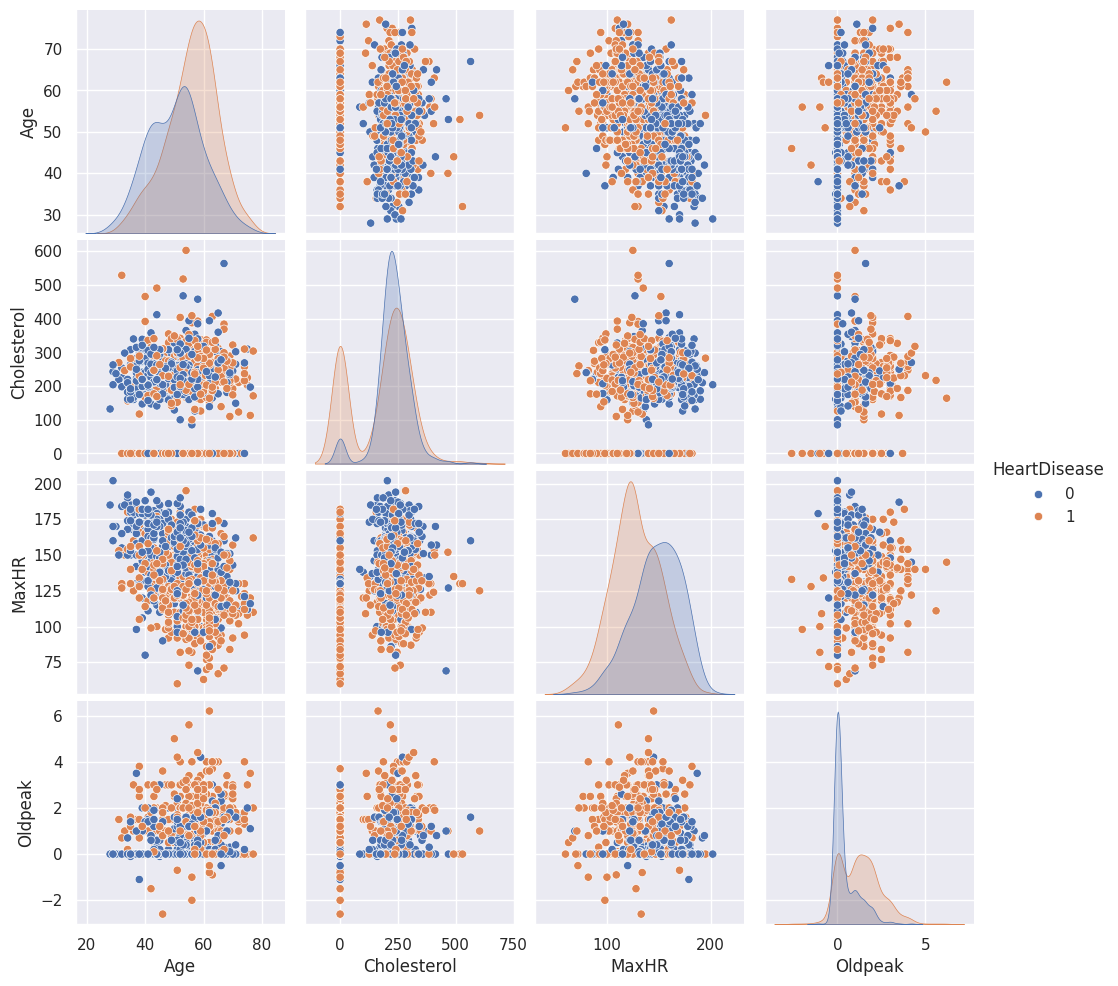

In [ ]:
sns.pairplot(df[['Age', 'Cholesterol', 'MaxHR', 'Oldpeak','HeartDisease']], hue='HeartDisease')

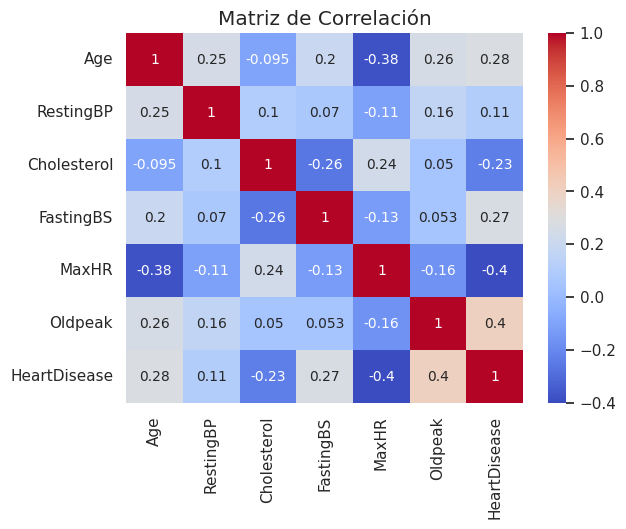

In [ ]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Text(0, 0.5, 'MaxHR')

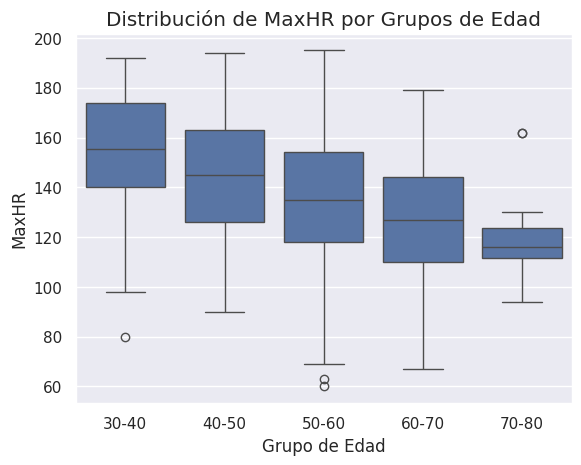

In [ ]:
df_ages = df.copy()
df_ages['AgeGroup'] = pd.cut(df['Age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])
sns.boxplot(x='AgeGroup', y='MaxHR', data=df_ages)
plt.title('Distribución de MaxHR por Grupos de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('MaxHR')

Text(0.5, 1.0, 'Distribución de Oldpeak por HeartDisease')

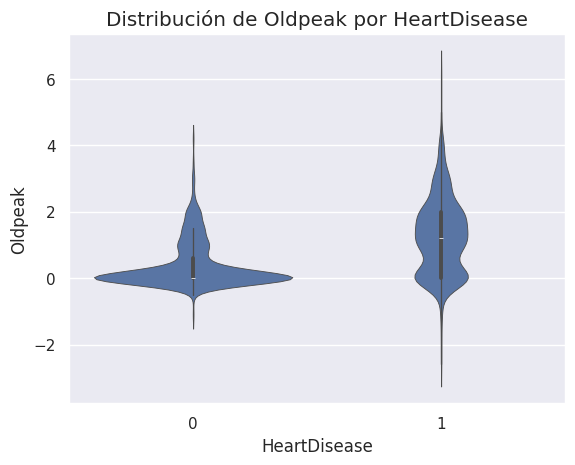

In [ ]:
sns.violinplot(x='HeartDisease', y='Oldpeak', data=df)
plt.title('Distribución de Oldpeak por HeartDisease')

Text(0.5, 1.0, 'Colesterol por Tipo de Dolor Torácico')

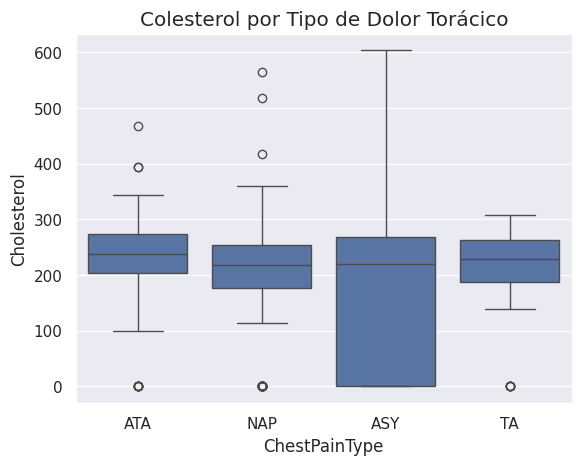

In [ ]:
sns.boxplot(data=df, x='ChestPainType', y='Cholesterol')
plt.title('Colesterol por Tipo de Dolor Torácico')

Text(0.5, 1.0, 'Distribución de Género según la Enfermedad Cardíaca')

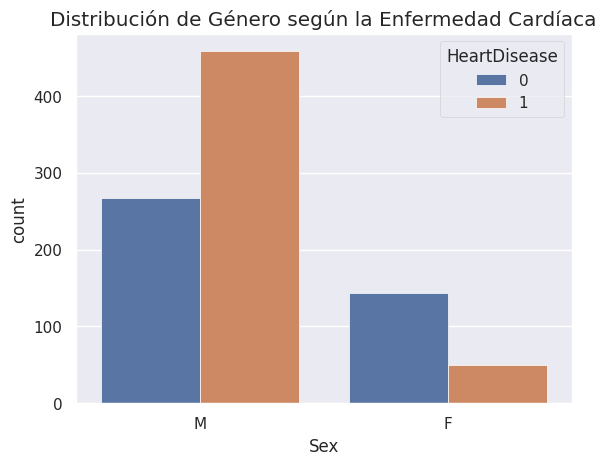

In [ ]:
sns.countplot(data=df, x='Sex', hue='HeartDisease')
plt.title('Distribución de Género según la Enfermedad Cardíaca')

Text(0.5, 1.0, 'Distribución de Tipo de Dolor Torácico según la Enfermedad Cardíaca')

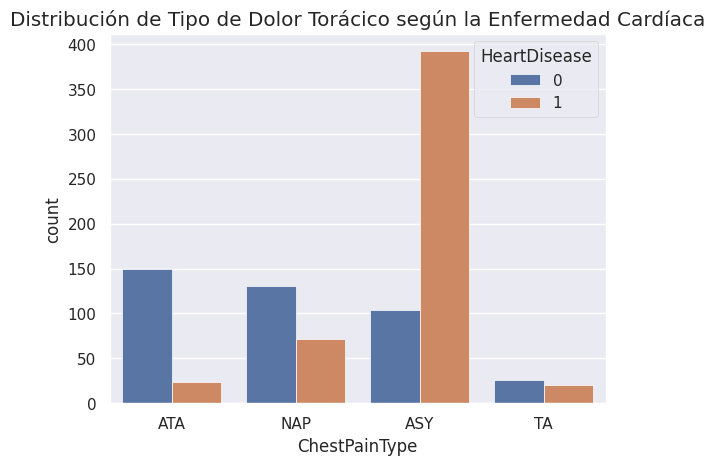

In [ ]:
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')
plt.title('Distribución de Tipo de Dolor Torácico según la Enfermedad Cardíaca')

## Label Encoding para el proceso de machine learning y deep learning
Se transforman las filas que son strings, en variables numericas que puedan leer los modelos

Preprocesamiento requerido para la aplicacion de modelos de clasificacion

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding para transformar las variables categóricas
label_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
ChestPainType,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,int64
MaxHR,int64
ExerciseAngina,int64
Oldpeak,float64


# Algoritmo Genetico

100%|██████████| 100/100 [09:10<00:00,  5.51s/it]

Mejores características seleccionadas: ['FastingBS' 'ST_Slope' 'ChestPainType' 'Sex' 'ExerciseAngina']
Error de validación cruzada: 0.1678


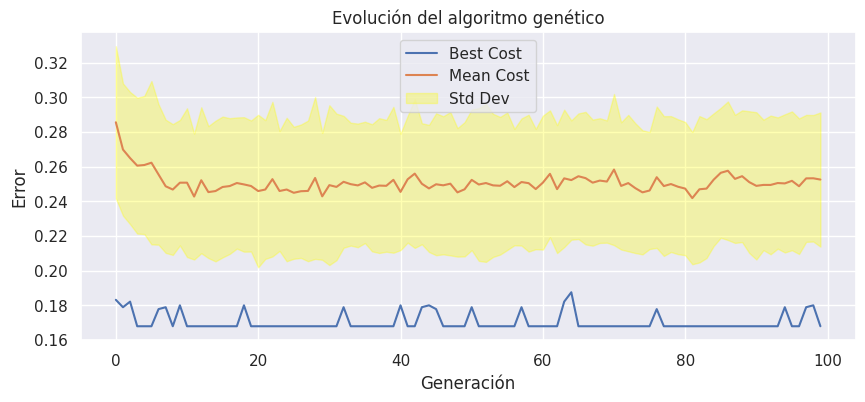

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import matplotlib.pyplot as plt
from __future__ import division, print_function, unicode_literals
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

# Codificación de variables categóricas
df_encoded = df.copy()

X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]
n_features = X.shape[1]

# === Funciones GA estilo TSP ===
def ga_cost_function(solution, top_n=5):
    selected_features = solution[:top_n].astype(int)
    X_subset = X.iloc[:, selected_features]
    clf = DecisionTreeClassifier()
    scores = cross_val_score(clf, X_subset, y, cv=5)
    return 1 - np.mean(scores)  # Error

def GA_initialize_population(n_solutions, n_features):
    return np.array([np.random.permutation(n_features) for _ in range(n_solutions)])

def GA_crossover(sol1, sol2):
    l = len(sol1)
    cstart = np.random.randint(l)
    cend = np.random.randint(cstart, l)
    result = np.full(l, -1)
    result[cstart:cend] = sol1[cstart:cend]
    c = 0
    for i in range(l):
        if sol2[i] not in result:
            while result[c] != -1:
                c += 1
            result[c] = sol2[i]
    return result

def GA_mutate(solution, mutation_prob):
    mutated = solution.copy()
    for i in range(len(mutated)):
        if np.random.rand() < mutation_prob:
            j = np.random.randint(len(mutated))
            mutated[i], mutated[j] = mutated[j], mutated[i]
    return mutated

# === Parámetros del algoritmo genético ===
pop_size = 100
n_generations = 100
mutation_prob = 0.2
crossover_prob = 0.6
top_n_features = 5

# === Ejecución del algoritmo genético ===
population = GA_initialize_population(pop_size, n_features)
best_costs, mean_costs, std_costs = [], [], []
best_solution = None
best_score = float("inf")

for generation in tqdm(range(n_generations)):
    # Crossover
    offspring = []
    n_cross = int(pop_size * crossover_prob)
    for _ in range(n_cross):
        p1, p2 = population[np.random.choice(len(population), 2, replace=False)]
        child = GA_crossover(p1, p2)
        offspring.append(child)
    offspring = np.array(offspring)

    # Unión de padres e hijos
    combined = np.vstack([population, offspring])

    # Mutación
    for i in range(len(combined)):
        combined[i] = GA_mutate(combined[i], mutation_prob)

    # Evaluación
    costs = np.array([ga_cost_function(ind, top_n=top_n_features) for ind in combined])
    sorted_idx = np.argsort(costs)
    population = combined[sorted_idx[:pop_size]]

    # Estadísticas
    gen_best = costs[sorted_idx[0]]
    if gen_best < best_score:
        best_score = gen_best
        best_solution = population[0]

    best_costs.append(gen_best)
    mean_costs.append(np.mean(costs))
    std_costs.append(np.std(costs))

# === Resultados ===
feature_names = X.columns.to_numpy()
selected_feature_names = feature_names[best_solution[:top_n_features]]
print("Mejores características seleccionadas:", selected_feature_names)
print("Error de validación cruzada:", round(best_score, 4))

# === Gráfico de evolución ===
plt.figure(figsize=(10, 4))
plt.plot(best_costs, label="Best Cost")
plt.plot(mean_costs, label="Mean Cost")
plt.fill_between(range(len(mean_costs)),
                 np.array(mean_costs) - np.array(std_costs),
                 np.array(mean_costs) + np.array(std_costs),
                 color="yellow", alpha=0.3, label="Std Dev")
plt.xlabel("Generación")
plt.ylabel("Error")
plt.title("Evolución del algoritmo genético")
plt.legend()
plt.grid(True)
plt.show()

# Aplicacion de algoritmos de Clasificacion para predecir si un paciente tiene una enfermedad del corazon

Creacion de la pipeline para evaluar los hiperparametros mas optimos a evaluar para cada modelo

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Seleccion del data y el target
#X = df[df.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
#y = df.values[:,-1]

X = df.values[:,:-1]
y = df.values[:,-1]

#Eleccion del conjunto de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#Eleccion de modelos a evaluar
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "NaiveBayes": GaussianNB()
}

# Pipeline para encontrar los mejores hiperparametros para los modelos
models_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [100, 200,300],
            "classifier__max_depth": [None, 10, 20,30]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "classifier__C": [0.01, 0.1, 1, 10],
            "classifier__penalty": ["l2"]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ["linear", "rbf"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "classifier__n_neighbors": [3, 5, 7],
            "classifier__weights": ["uniform", "distance"]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [3, 5],
            "classifier__learning_rate": [0.01, 0.1]
        }
    },
    "NaiveBayes": {
        "model": GaussianNB(),
        "params": { "classifier__var_smoothing": [1e-9, 1e-8, 1e-7] }
    }
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

hiper = []
for name, mp in models_params.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", mp["model"])
    ])

    grid = GridSearchCV(pipeline, mp["params"], cv=cv, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    hiper.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Best CV Accuracy": grid.best_score_
    })

# DataFrame con resultados de los hiperparametros mas optimos para cada modelo evaluado
hiper_results_df = pd.DataFrame(hiper).sort_values(by="Best CV Accuracy", ascending=False)
print(hiper_results_df)

                Model                                        Best Params  \
2                 SVM  {'classifier__C': 1, 'classifier__kernel': 'rbf'}   
0        RandomForest  {'classifier__max_depth': None, 'classifier__n...   
4             XGBoost  {'classifier__learning_rate': 0.01, 'classifie...   
3                 KNN  {'classifier__n_neighbors': 5, 'classifier__we...   
5          NaiveBayes               {'classifier__var_smoothing': 1e-09}   
1  LogisticRegression  {'classifier__C': 0.1, 'classifier__penalty': ...   

   Best CV Accuracy  
2          0.871795  
0          0.869231  
4          0.858974  
3          0.857692  
5          0.856410  
1          0.855128  


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:59:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejor visualizacion de Hiperparametros

In [ ]:
for _, row in hiper_results_df.iterrows():
    print(f"\n🔍 {row['Model']}")
    for param, value in row["Best Params"].items():
        print(f"   {param}: {value}")
    print(f"   Best CV Accuracy: {row['Best CV Accuracy']:.4f}")


🔍 SVM
   classifier__C: 1
   classifier__kernel: rbf
   Best CV Accuracy: 0.8718

🔍 RandomForest
   classifier__max_depth: None
   classifier__n_estimators: 200
   Best CV Accuracy: 0.8692

🔍 XGBoost
   classifier__learning_rate: 0.01
   classifier__max_depth: 3
   classifier__n_estimators: 200
   Best CV Accuracy: 0.8590

🔍 KNN
   classifier__n_neighbors: 5
   classifier__weights: uniform
   Best CV Accuracy: 0.8577

🔍 NaiveBayes
   classifier__var_smoothing: 1e-09
   Best CV Accuracy: 0.8564

🔍 LogisticRegression
   classifier__C: 0.1
   classifier__penalty: l2
   Best CV Accuracy: 0.8551


Creacion de la pipeline para hacer predicciones por cada modelos almacenando las metricas en un DataFrame

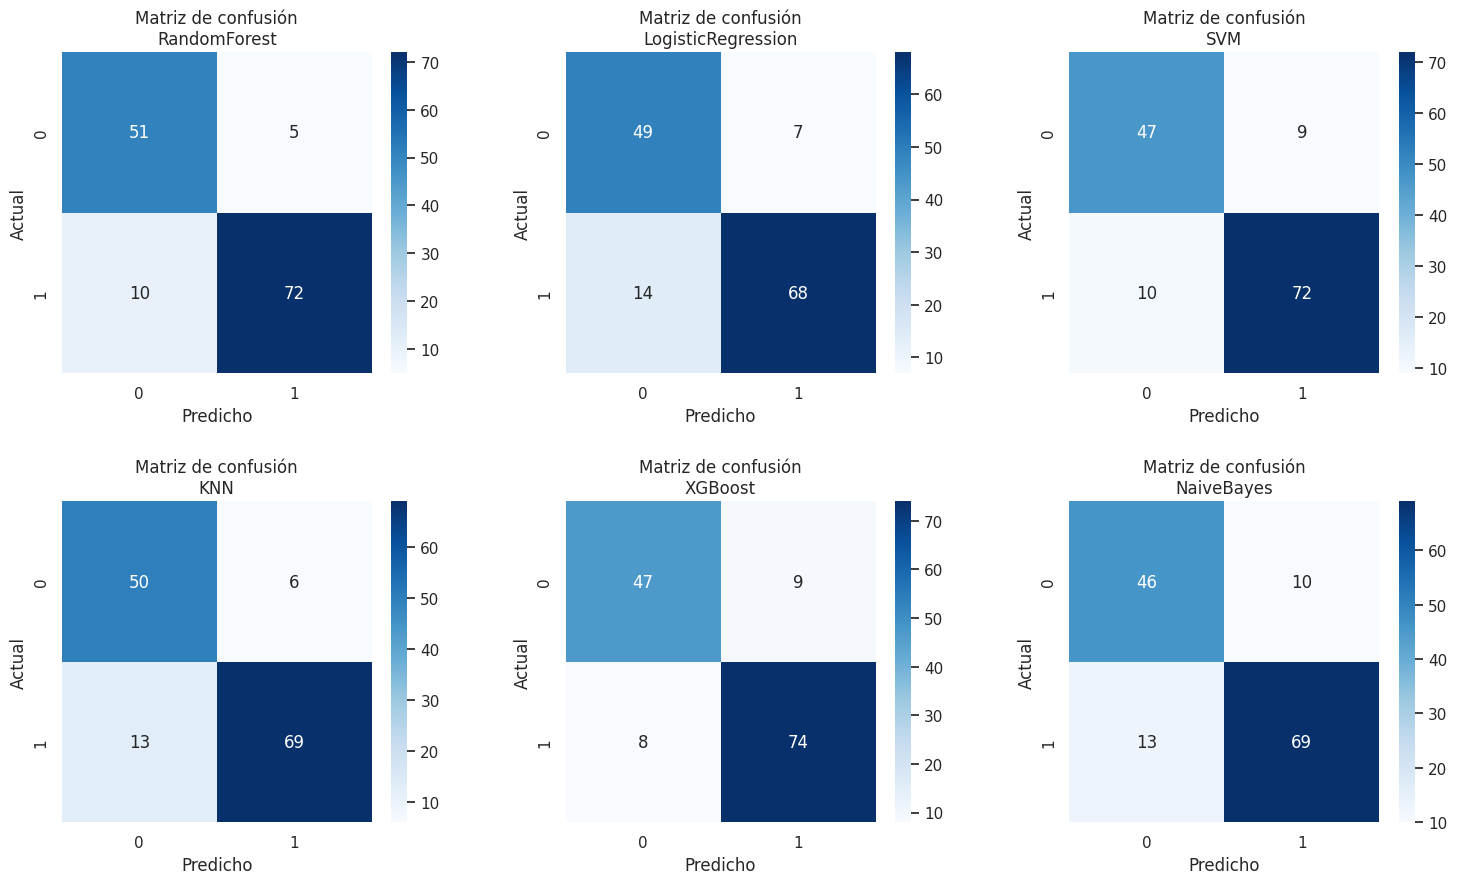

In [ ]:
#Creacion del diccionario que contiene los mejores hiperparametros encontrados con el gridsearch
best_models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=None),
    "LogisticRegression": LogisticRegression(C=10, penalty='l2'),
    "SVM": SVC(C=1, kernel='rbf'),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "XGBoost": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=200,
                                      eval_metric='logloss'),
    "NaiveBayes": GaussianNB(var_smoothing=1e-9)
}
#Creacion de la pipeline que ejecutará primero el scaler y luego evaluará el modelo
pipelines = {
    name: Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", model)
    ])
    for name, model in best_models.items()
}

# Ejecucion de los modelos y evaluacion de metricas para guardarlo en un dataframe de resultados. Grafica tambien la matriz de confusion para cada modelo
results = []
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx,(name, pipeline) in enumerate(pipelines.items()):
    # Fit y predicción
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average ='weighted',zero_division=0)
    recall = recall_score(y_test, y_pred, average ='weighted',zero_division=0)

    # Cross-validation (accuracy)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    cv_mean = cv_scores.mean()

    #Matriz de confusion
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"Matriz de confusión\n{name}")
    axes[idx].set_xlabel("Predicho")
    axes[idx].set_ylabel("Actual")


    # Guardar resultados
    results.append({
        "Model": name,
        "Test Accuracy": acc,
        "Test Precision": prec,
        "Test Recall": recall,
        "CV Accuracy": cv_mean
    })

for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Crear DataFrame de los resultados para una mejor visualizacion
results_df = pd.DataFrame(results).sort_values(by="Test Recall", ascending=False)

In [ ]:
print(results_df)

                Model  Test Accuracy  Test Precision  Test Recall  CV Accuracy
0        RandomForest       0.891304        0.892969     0.891304     0.861538
4             XGBoost       0.876812        0.876543     0.876812     0.858974
3                 KNN       0.862319        0.868728     0.862319     0.856410
1  LogisticRegression       0.847826        0.854364     0.847826     0.855128
2                 SVM       0.840580        0.845821     0.840580     0.860256
5          NaiveBayes       0.833333        0.835372     0.833333     0.856410


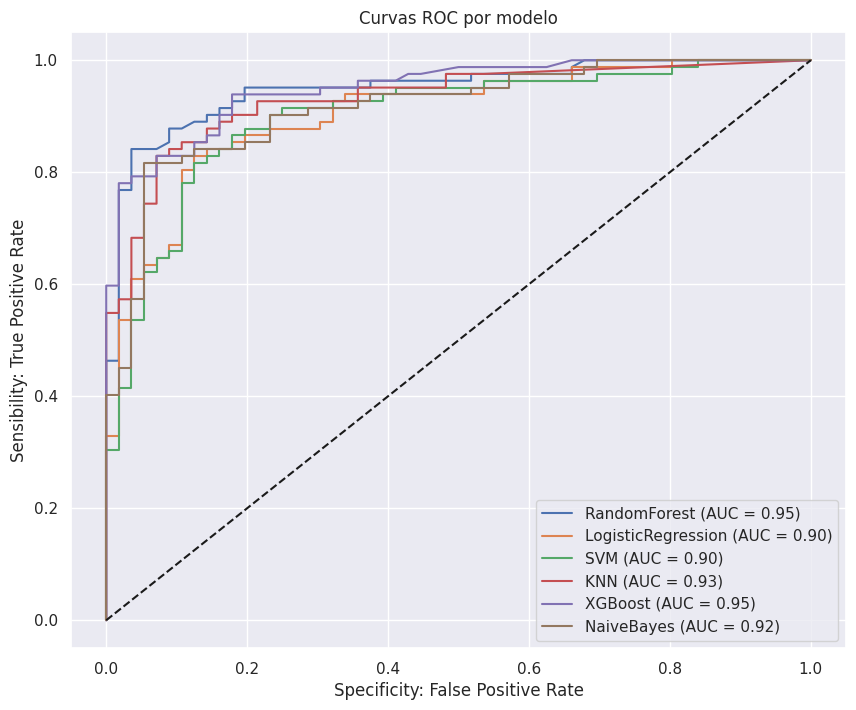

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)

    # Obtener probabilidades (solo para clasificadores que soportan predict_proba)
    if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
        y_scores = pipeline.predict_proba(X_test)[:, 1]
    else:
        # Para SVM sin probas, usar decision_function
        y_scores = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Specificity: False Positive Rate")
plt.ylabel("Sensibility: True Positive Rate")
plt.title("Curvas ROC por modelo")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Deep Learning Aplicattion

## Modelo 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dropout(0.05),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(2, activation='softmax')
])
model.summary()
model.compile(optimizer=Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 299,138 (1.14 MB)

 Trainable params: 299,138 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5679 - loss: 3.0353 - val_accuracy: 0.5942 - val_loss: 1.5713
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5910 - loss: 1.0297 - val_accuracy: 0.6014 - val_loss: 0.6255
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6331 - loss: 0.7745 - val_accuracy: 0.7246 - val_loss: 0.5596
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6550 - loss: 0.6561 - val_accuracy: 0.6884 - val_loss: 0.5659
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6862 - loss: 0.6270 - val_accuracy: 0.6884 - val_loss: 0.5853
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6467 - loss: 0.6356 - val_accuracy: 0.7391 - val_loss: 0.5760
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7184 - loss: 0.5836 - val_accuracy: 0.7246 - val_loss: 0.5843
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6993 - loss: 0.6207 - val_accuracy: 0.7319 - val_loss

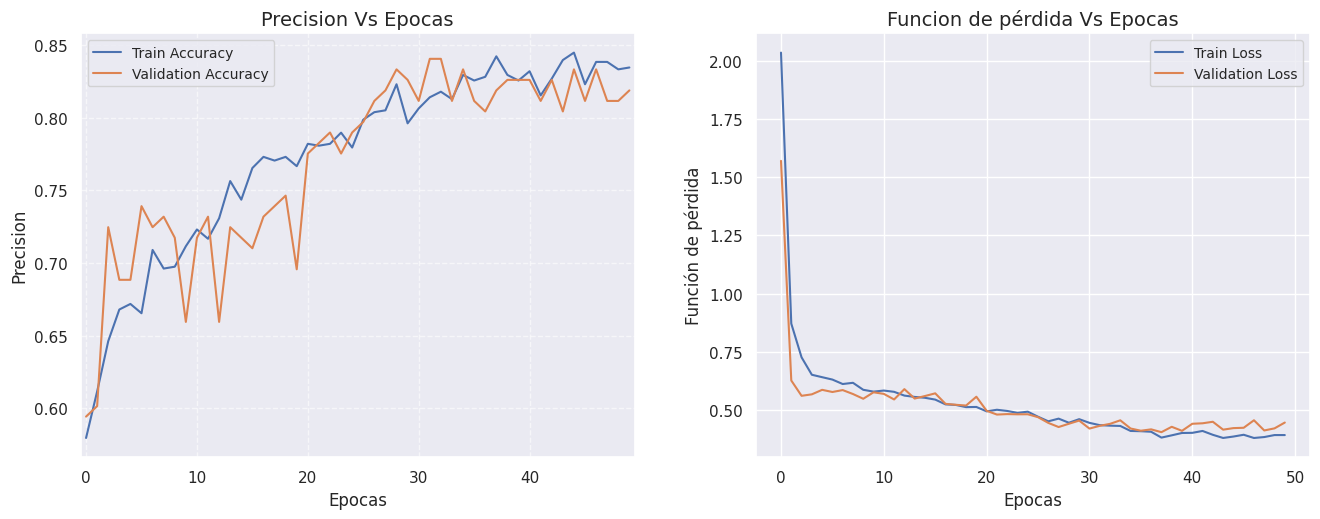

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)
with tf.device('/device:GPU:0'):
  history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(14, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precision Vs Epocas', fontsize=14)
plt.xlabel('Epocas', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.margins(x=0.01)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Funcion de pérdida Vs Epocas', fontsize=14)
plt.xlabel('Epocas', fontsize=12)
plt.ylabel('Función de pérdida', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

### Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.79        56
         1.0       0.87      0.82      0.84        82

    accuracy                           0.82       138
   macro avg       0.81      0.82      0.81       138
weighted avg       0.82      0.82      0.82       138



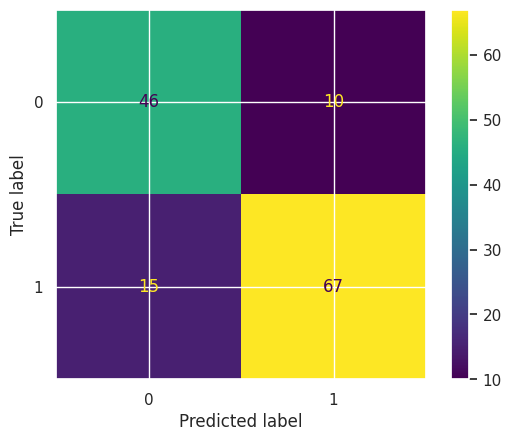

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicción de probabilidades
y_pred_prob = model.predict(X_test)

# Convertir probabilidades a clases (0 o 1)
y_pred_class = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred_class))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_class)

# Mostrarla de forma gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### AUC ROC Curve

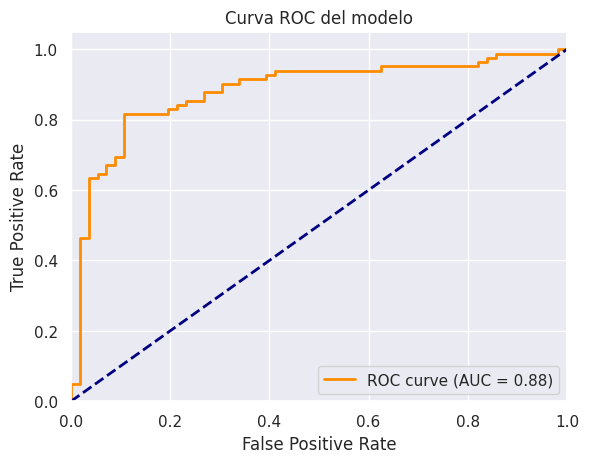

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del modelo')
plt.legend(loc="lower right")
plt.show()

## Modelo 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dense(2048, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.15),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(2, activation='softmax')
])
model.summary()
model.compile(optimizer=Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 1024)           │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2048)           │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,907,074 (18.72 MB)

 Trainable params: 4,907,074 (18.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.5266 - loss: 7.4929 - val_accuracy: 0.5942 - val_loss: 2.9488
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.5431 - loss: 2.9525 - val_accuracy: 0.5942 - val_loss: 2.7084
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.5684 - loss: 2.7085 - val_accuracy: 0.7101 - val_loss: 2.5432
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.6661 - loss: 2.5259 - val_accuracy: 0.5507 - val_loss: 2.4048
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6742 - loss: 2.3458 - val_accuracy: 0.7609 - val_loss: 2.2439
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.6612 - loss: 2.2708 - val_accuracy: 0.6957 - val_loss: 2.1510
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.7281 - loss: 2.1227 - val_accuracy: 0.6522 - val_loss: 2.0706
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.7351 - loss: 2.0257 - val_accuracy:

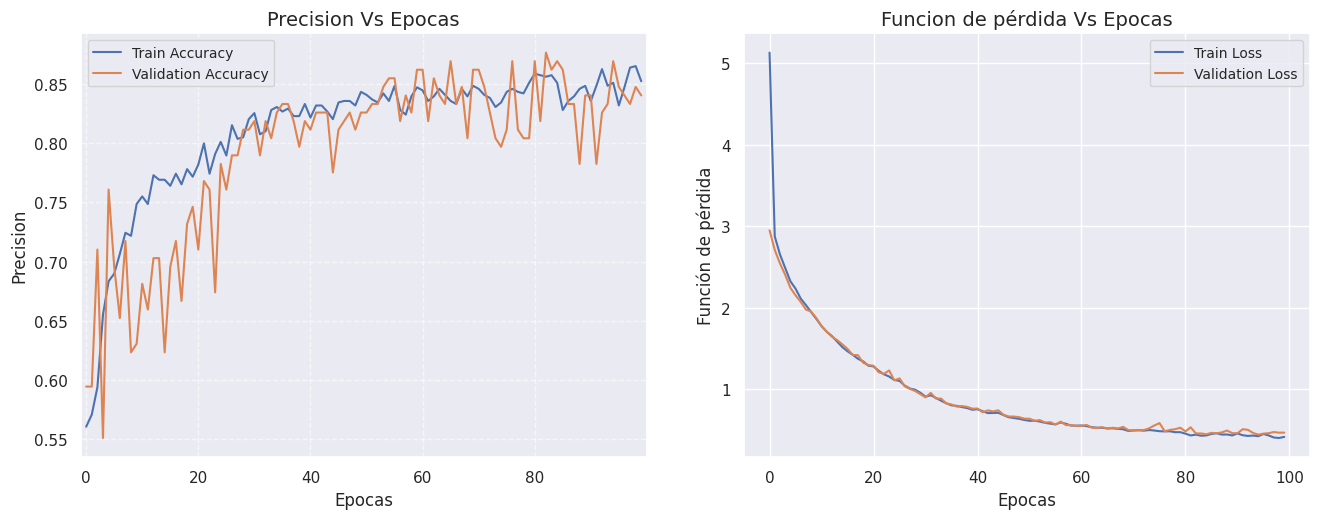

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)
with tf.device('/device:GPU:0'):
  history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(14, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precision Vs Epocas', fontsize=14)
plt.xlabel('Epocas', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.margins(x=0.01)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Funcion de pérdida Vs Epocas', fontsize=14)
plt.xlabel('Epocas', fontsize=12)
plt.ylabel('Función de pérdida', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80        56
         1.0       0.87      0.84      0.86        82

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        56
         1.0       0.88      0.83      0.86        82

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138



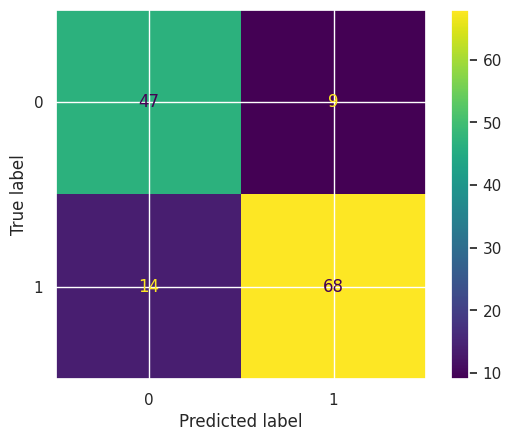

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# Predicción de probabilidades
y_pred_prob = model.predict(X_test)

# Convertir probabilidades a clases (0 o 1)
y_pred_class = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred_class))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_class)

# Mostrarla de forma gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

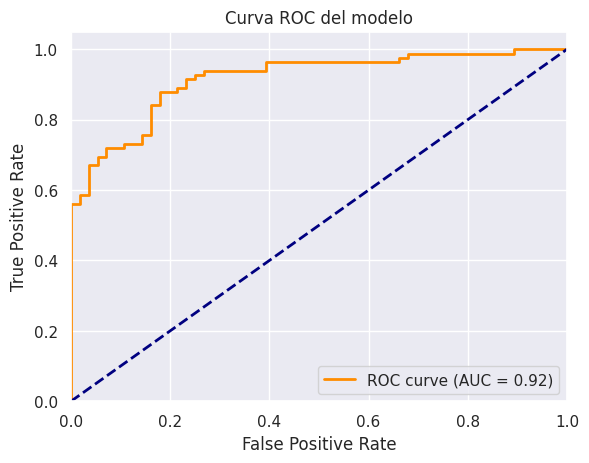

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del modelo')
plt.legend(loc="lower right")
plt.show()

## Modelo 3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1024, activation='relu'),
    Dropout(0.05),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(2, activation='softmax')
])
model.summary()
model.compile(optimizer=Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 512)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,385,090 (5.28 MB)

 Trainable params: 1,385,090 (5.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5705 - loss: 2.7253 - val_accuracy: 0.5435 - val_loss: 0.7454
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5830 - loss: 0.7426 - val_accuracy: 0.7464 - val_loss: 0.5772
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6348 - loss: 0.6497 - val_accuracy: 0.6014 - val_loss: 0.6560
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6967 - loss: 0.6035 - val_accuracy: 0.6594 - val_loss: 0.6081
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6882 - loss: 0.6232 - val_accuracy: 0.7246 - val_loss: 0.5851
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7661 - loss: 0.5595 - val_accuracy: 0.7319 - val_loss: 0.5645
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6897 - loss: 0.5695 - val_accuracy: 0.7174 - val_loss: 0.5406
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7759 - loss: 0.5230 - val_accuracy: 0.7319 - v

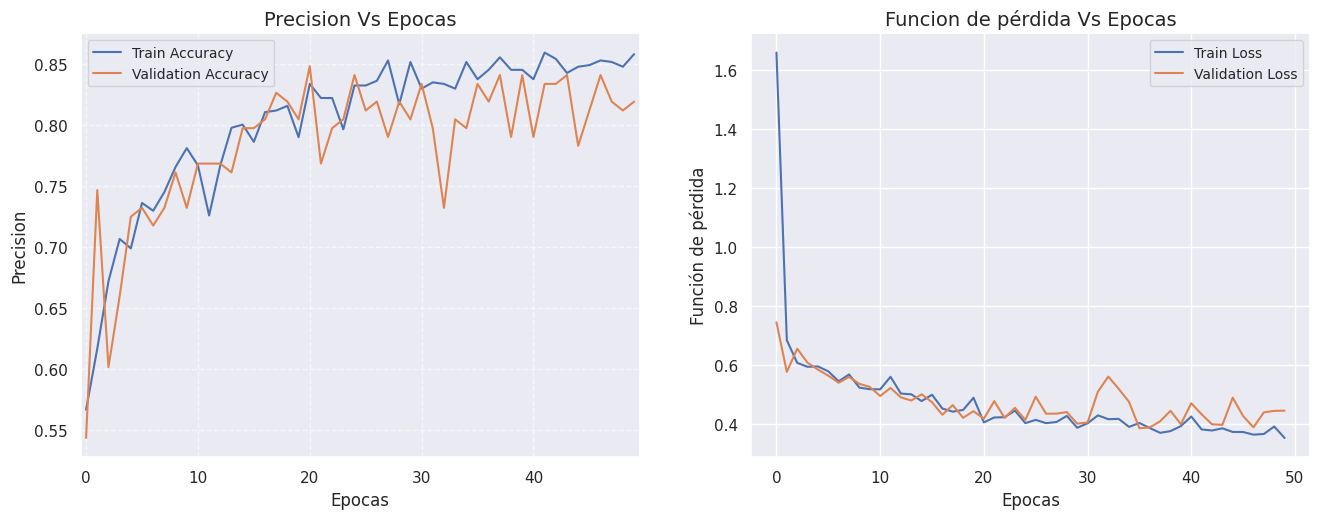

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

with tf.device('/device:GPU:0'):
  history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

plt.figure(figsize=(14, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precision Vs Epocas', fontsize=14)
plt.xlabel('Epocas', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.margins(x=0.01)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Funcion de pérdida Vs Epocas', fontsize=14)
plt.xlabel('Epocas', fontsize=12)
plt.ylabel('Función de pérdida', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout(pad=3.0)
plt.show()

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

         0.0       0.72      0.89      0.80        56
         1.0       0.91      0.77      0.83        82

    accuracy                           0.82       138
   macro avg       0.82      0.83      0.82       138
weighted avg       0.84      0.82      0.82       138



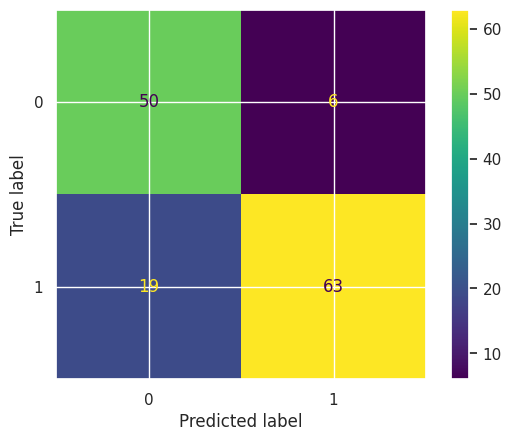

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


# Predicción de probabilidades
y_pred_prob = model.predict(X_test)

# Convertir probabilidades a clases (0 o 1)
y_pred_class = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred_class))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_class)

# Mostrarla de forma gráfica
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

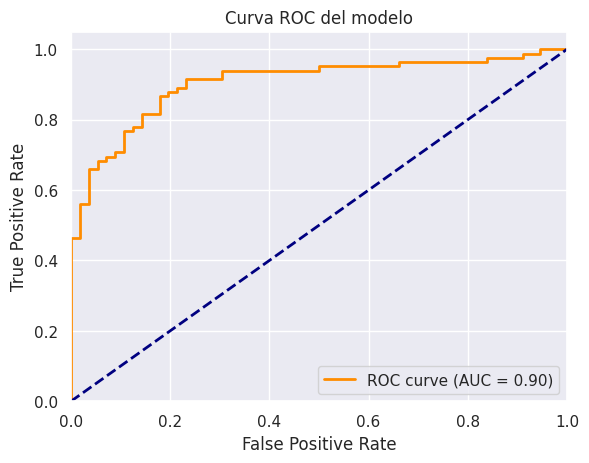

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC del modelo')
plt.legend(loc="lower right")
plt.show()